In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape images to 28x28x1 and one-hot encode labels
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
train_images.shape

(60000, 28, 28, 1)

In [4]:
test_labels.shape

(10000, 10)

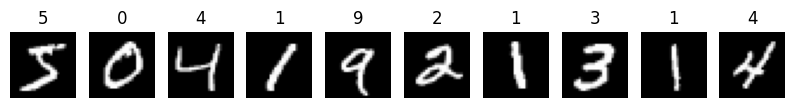

In [5]:
import matplotlib.pyplot as plt

def plot_sample_images(images, labels, num_samples=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(np.argmax(labels[i]))
        plt.axis('off')
    plt.show()

plot_sample_images(train_images, train_labels)

In [6]:
def LeNet5(input_shape, num_classes):
    model = Sequential()

    # Layer 1: Convolutional Layer
    model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2))) # Subsampling

    # Layer 2: Convolutional Layer
    model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2))) # Subsampling

    # Layer 3: Convolutional Layer
    model.add(Conv2D(filters=120, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

    # Flatten the feature maps
    model.add(Flatten())

    # Fully Connected Layer 1
    model.add(Dense(units=84, activation='relu'))
    model.add(Dropout(0.5))  # Dropout layer

    # Output Layer
    model.add(Dense(units=num_classes, activation='softmax'))

    return model



In [7]:
input_shape=(28, 28, 1)
num_classes = 10

# Create LeNet-5 model
model = LeNet5(input_shape, num_classes)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 120)           │          17,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          40,404 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,226 (239.16 KB)

 Trainable params: 61,226 (239.16 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7304 - loss: 0.8231 - val_accuracy: 0.9698 - val_loss: 0.0979
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9579 - loss: 0.1492 - val_accuracy: 0.9806 - val_loss: 0.0610
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9713 - loss: 0.1027 - val_accuracy: 0.9850 - val_loss: 0.0455
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9782 - loss: 0.0779 - val_accuracy: 0.9865 - val_loss: 0.0428
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9814 - loss: 0.0631 - val_accuracy: 0.9855 - val_loss: 0.0447
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9839 - loss: 0.0582 - val_accuracy: 0.9885 - val_loss: 0.0333
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9850 - loss: 0.0514 - val_accuracy: 0.9895 - val_loss: 0.0302
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9885 - loss: 0.0407 - val_accuracy: 

In [9]:
score = model.evaluate(test_images, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9863 - loss: 0.0506
Test loss: 0.0413917638361454
Test accuracy: 0.9889000058174133


In [10]:
model.save('handwritten_digit_classification_model.h5')

In [ ]:
from keras.models import load_model

model = load_model('handwritten_digit_classification_model.h5')
